In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
data_transform = transforms.Compose([
        transforms.Resize((300,300)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

In [25]:
train_dataset = datasets.ImageFolder(root='../aligned-data/train',
                                           transform=data_transform)
train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=8, shuffle=True, 
                                            num_workers=4)
test_dataset = datasets.ImageFolder(root='../aligned-data/test',
                                           transform=data_transform)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=90, shuffle=True,
                                             num_workers=4)
test_x, test_y = next(iter(test_dataset_loader))
test_x, test_y = Variable(test_x), Variable(test_y)

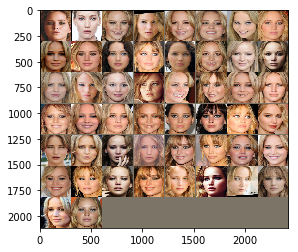

In [26]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    
    plt.pause(0.001)

inputs, classes = next(iter(train_dataset_loader))
class_names = train_dataset.classes
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 34 * 34, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 9)
        self.dropout = nn.Dropout2d(p=0.3)

    def forward(self, x):
        feat1 = self.conv1(x)
        #print(feat1.shape)
        x = self.pool(F.relu(feat1))
        feat2 = self.conv2(x)
        #print(feat2.shape)
        x = self.pool(F.relu(feat2))
        #print(x.shape)        
        feat3 = self.conv3(x)
        #print(feat3.shape)
        x = self.pool(F.relu(feat3))
        #print(x.shape)
        x = x.view(-1, 32 * 34 * 34)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x, [feat1, feat2, feat3]

net = Net()

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(net.parameters(), lr=1e-3)

In [7]:
def calc_accuracy(mdl, X, Y):
    # TODO: why can't we call .data.numpy() for train_acc as a whole?
    outputs, _ = mdl(X)
    max_vals, max_indices = torch.max(outputs,1)
    train_acc = (max_indices == Y).sum().data.numpy()/max_indices.size()[0]
    return train_acc

In [8]:
for epoch in range(10):  # loop over the dataset multiple times
    acc = 0
    running_loss = 0.0
    test_acc = 0
    train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=8, shuffle=True,
                                             num_workers=4)
    
    for i, data in enumerate(train_dataset_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs, _ = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        acc += calc_accuracy(net, inputs, labels)
        # print statistics
        running_loss += loss.data[0]
        #if i % 5 == 4:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %
            #      (epoch + 1, i + 1, running_loss / 5))
        #    running_loss = 0.0
        
    # Compute test accuracy
    test_acc += calc_accuracy(net, test_x, test_y)

    print('Loss: ', running_loss)
    print('Training accuracy: ', acc/(len(train_dataset_loader)))
    print('Test accuracy: ', test_acc)

print('Finished Training')

Loss:  122.23936009407043
Training accuracy:  [0.25133929]
Test accuracy:  [0.21111111]
Loss:  90.25955539941788
Training accuracy:  [0.71741071]
Test accuracy:  [0.47777778]
Loss:  43.64260292053223
Training accuracy:  [0.92857143]
Test accuracy:  [0.67777778]
Loss:  26.931360006332397
Training accuracy:  [0.98214286]
Test accuracy:  [0.7]
Loss:  16.52501229569316
Training accuracy:  [0.99553571]
Test accuracy:  [0.74444444]
Loss:  12.045269425958395
Training accuracy:  [0.99107143]
Test accuracy:  [0.77777778]
Loss:  7.56028791423887
Training accuracy:  [1.]
Test accuracy:  [0.77777778]
Loss:  5.056121184956282
Training accuracy:  [1.]
Test accuracy:  [0.81111111]
Loss:  3.1095421279314905
Training accuracy:  [1.]
Test accuracy:  [0.82222222]
Loss:  2.0669803651981056
Training accuracy:  [1.]
Test accuracy:  [0.82222222]
Finished Training


In [26]:
len(train_dataset)

445

In [71]:
train_dataset = datasets.ImageFolder(root='../aligned-data/train/person-9',
                                           transform=data_transform)
train_dataset_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=50, shuffle=False,
                                             num_workers=4)

In [72]:
full_input, full_labels = next(iter(train_dataset_loader))
full_input, full_labels = Variable(full_input), Variable(full_labels)

In [73]:
scores, full_features = net(full_input)

In [76]:
torch.save(full_features[2], '../features/person9_3.dat')

In [53]:
cd aligned-data/train/

C:\Ananya\Coursework\Neural networks\final-proj\aligned-data\train


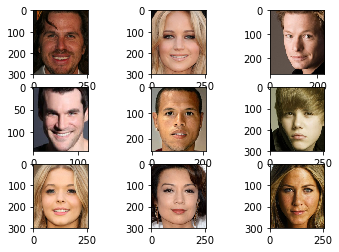

In [70]:
img1 = 'person1/0-FaceId-0.jpg'
img2 = 'person2/8-FaceId-0.jpg'
img3 = 'person3/1-FaceId-0.jpg'
img4 = 'person4/17-FaceId-0.jpg'
img5 = 'person5/1-FaceId-0.jpg'
img6 = 'person6/5-FaceId-0.jpg'
img7 = 'person7/7-FaceId-0.jpg'
img8 = 'person8/3-FaceId-0.jpg'
img9 = 'person9/2-FaceId-0.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(1)
plt.subplot(331)
plt.imshow(mpimg.imread(img1))
plt.subplot(332)
plt.imshow(mpimg.imread(img2))
plt.subplot(333)
plt.imshow(mpimg.imread(img3))
plt.subplot(334)
plt.imshow(mpimg.imread(img4))
plt.subplot(335)
plt.imshow(mpimg.imread(img5))
plt.subplot(336)
plt.imshow(mpimg.imread(img6))
plt.subplot(337)
plt.imshow(mpimg.imread(img7))
plt.subplot(338)
plt.imshow(mpimg.imread(img8))
plt.subplot(339)
plt.imshow(mpimg.imread(img9))
plt.show()